# Advanced Programming Assignment - 22


#### 1. Create a class Smoothie and do the following:
    - Create an instance attribute called ingredients.
    - Create a get_cost method which calculates the total cost of the ingredients used to make the smoothie.
    - Create a get_price method which returns the number from get_cost plus the number from get_cost multiplied by 1.5. Round to two decimal places.
    - Create a get_name method which gets the ingredients and puts them in alphabetical order into a nice descriptive sentence. 
#### If there are multiple ingredients, add the word &quot;Fusion&quot; to the end but otherwise, add &quot;Smoothie&quot;.
#### Remember to change &quot;-berries&quot; to &quot;-berry&quot;. See the examples below.
    Ingredient    Price    
    
    Strawberries  1.50 dollar
    Banana        0.50 dollar
    Mango         2.50 dollar
    Blueberries   1.00 dollar
    Raspberries   1.00 dollar
    Apple         1.75 dollar
    Pineapple     3.50 dollar

In [1]:
ing_price ={"Strawberries": 1.50, "Banana": 0.50, "Mango": 2.50, "Blueberries" : 1.00, 
            "Raspberries": 1.00, "Apple": 1.75, "Pineapple": 3.50}

class Smoothie:
    
    def __init__(self, ingredients=[]):
        self.ingredients = ingredients
        
   
    def get_cost(self):
        global ing_price
        cost = 0
        for i in self.ingredients:
            cost += ing_price[i]
        return ("$ " + str(cost))
            
        
    def get_price(self):
        price = float(self.get_cost().split(" ")[1]) + 1.5 * float(self.get_cost().split(" ")[1])
        return ("$ " + str(price))
        
                       
    def get_name(self):
        name = ''
        if len(self.ingredients) == 1:
            for i in self.ingredients:
                name += i.replace("berries", "berry") + " "
            name += "Smoothie"
        else:
            for i in sorted(self.ingredients):
                name += i.replace("berries", "berry") + " "
            name += "Fusion"
        return name 
        

In [2]:
s1 = Smoothie(["Banana"])

In [3]:
s1.ingredients

['Banana']

In [4]:
s1.get_cost()

'$ 0.5'

In [5]:
s1.get_price()

'$ 1.25'

In [6]:
s1.get_name()

'Banana Smoothie'

In [7]:
s2 = Smoothie(["Raspberries", "Strawberries", "Blueberries"])

In [8]:
s2.ingredients

['Raspberries', 'Strawberries', 'Blueberries']

In [9]:
s2.get_cost()

'$ 3.5'

In [10]:
s2.get_price()

'$ 8.75'

In [11]:
s2.get_name()

'Blueberry Raspberry Strawberry Fusion'

#### 2. Your task is to write a program which allows teachers to create a multiple choice test in a class called Testpaper and to be also able to assign a minimum pass mark. The testpaper&#39;s subject should also be included. The attributes are in the following order:
    1. subject
    2. markscheme
    3. pass_mark
#### As well as that, we need to create student objects to take the test itself! 
#### Create another class called Student and do the following:
    - Create an attribute called tests_taken and set the default as 'No tests taken'.
    - Make a method called take_test(), which takes in the testpaper object they are completing and the student's answers. Compare what they wrote to the mark scheme, and append to the/create a dictionary assigned to tests_taken in the way as shown in the point below.
    - Each key in the dictionary should be the testpaper subject and each value should be a string in the format seen in the examples below (whether or not the student has failed, and their percentage in brackets).

In [43]:
import re   

class Testpaper:
    
    def __init__(self, subject, markscheme, pass_mark):
        self.subject = subject
        self.markscheme = markscheme
        self.pass_mark = pass_mark
        
        


class Student:
    
    def __init__(self):
        self.tests_taken = "No tests taken"
 
    
    def take_test(self, paper, marks):
        self.marks = marks        
                  
        c = 0
        l = len(paper.markscheme)
        
        for i in self.marks:
            if i in paper.markscheme:
                c += 1
            else:
                pass
        
        p = int(c/l * 100)
        
        if self.tests_taken == "No tests taken":
            self.tests_taken = {}        
        if p >= int(re.findall(r'\d+',paper.pass_mark)[0]):
            self.tests_taken[paper.subject] = f'Passed! ({p}%)'            
        else:
            self.tests_taken[paper.subject] = f'Failed! ({p}%)'
        
        

In [44]:
paper1 = Testpaper("Maths", ["1A", "2C", "3D", "4A", "5A"], "60%")
paper2 = Testpaper("Chemistry", ["1C", "2C", "3D", "4A"], "75")
paper3 = Testpaper("Computing", ["1D", "2C", "3C", "4B", "5D", "6C", "7A"], "75%")

In [45]:
student1 = Student()
student2 = Student()

In [46]:
student1.tests_taken

'No tests taken'

In [47]:
student1.take_test(paper1, ["1A", "2D", "3D", "4A", "5A"])
student1.tests_taken

{'Maths': 'Passed! (80%)'}

In [48]:
student2.take_test(paper2, ["1C", "2D", "3A", "4C"])
student2.take_test(paper3, ["1A", "2C", "3A", "4C", "5D", "6C", "7B"])

In [49]:
student2.tests_taken

{'Chemistry': 'Failed! (25%)', 'Computing': 'Failed! (42%)'}

#### 3. Due to unforseen circumstances in Suburbia, the trains will be delayed by a further 10 minutes.

#### Create a function that will help to plan out and manage these delays! Create a function called manage_delays that does the following:
    - Parameters will be the train object, a destination and number of minutes the delay is.
    - Increment to the train object's expected_time by the delay, if the destination given is in the train object's
    destinations.

In [54]:
class Train:
    
    def __init__(self, destination, expected_time):
        self.destination = destination
        self.expected_time = expected_time
        
def manage_delays(train_obj, destination, delay_time):
    if destination in train_obj.destination:
        time_in_min = int(train_obj.expected_time.split(":")[0])*60 + int(train_obj.expected_time.split(":")[1])
        new_time = time_in_min + delay_time
        disp_delay = str(new_time//60) + ":" + str(new_time%60)
        train_obj.expected_time = disp_delay            
    

In [55]:
trains = [
  Train(["Townsville", "Suburbia", "Urbantska"], "13:04"),
  Train(["Farmsdale", "Suburbia", "Lakeside Valley"], "13:20"),
  Train(["Suburbia", "Townsville", "Lakeside Valley"], "13:22")
]

for t in trains:
    manage_delays(t, "Lakeside Valley", 60)

In [58]:
print(trains[0].expected_time)
print(trains[1].expected_time)
print(trains[2].expected_time)

13:04
14:20
14:22


#### 4. Ted works as a computer programmer at Minecraft Inc. His boss has just given him an important assignment to update the code for the minecart tracks by the end of April. However, he has recently had to self-isolate due to Corvid-19 and has left the code for the tracks. BACK AT WORK!! He has the shorthand for the tracks he's supposed to look at, and where the carts are suppost to end up, but not the actual code.

He knows that:

- "-->" = "Speed-Up Track" ⁠— If a minecart interacts with this track, it's velocity increases by 2.67 BPS unless it's at its maximum speed of 8 BPS.
- "<-->" = "Powered Track" ⁠— If a minecart interacts with this track, it's velocity remains the same.
- "<--" = "Slow-Down Track" ⁠— If a minecart interacts with this track, it's velocity decreases by 2.67 BPS unless it's velocity equals 0, at which point it stops.
- "---" = "Unpowered Track" ⁠— If a minecart interacts with this track, it's velocity decreases by 1 BPS unless it's velocity equals 0, at which point it stops.

#### Help Ted by writing a class for the tracks that interact with the provided Minecart class as shown above. And then write a function that will take a list of the shorthand tracks and:

- If the Minecart reaches the last peice of Track, return True.
- Else return the index of the Track where the Minecart stops.

In [74]:
class Minecraft:
    
    def __init__(self, tracks):
        self.tracks = tracks
        

def mine_run(tracks):
    
    vel = 0
    ind = 0
    
    for i in range(len(tracks)):
        if tracks[i] == "-->":
            if vel + 2.67 >= 8:
                vel = 8
            else:
                vel += 2.67
        elif tracks[i] == "<-->":
            continue
        elif tracks[i] == "<--":
            if vel - 2.67 <= 0:
                if i == len(tracks) - 1:
                    return True
                else:
                    ind = i               
            else:
                vel -= 2.67                
        else:
            if vel - 1 <= 0:
                if i == len(tracks) - 1:
                    return True
                else:
                    ind = i                
            else: 
                vel -= 1
    return ind
                
minecraft_1 = Minecraft(["-->", "-->", "-->", "<--", "<--", "<--"])
minecraft_2 = Minecraft(["-->", "<--", "-->", "-->", "<-->", "---"])

In [75]:
print(mine_run(minecraft_1.tracks))
print(mine_run(minecraft_2.tracks))

True
1


#### 5. Make a Rectangle class with four parameters, an x, a y (representing the top-left corner of the rectangle), a width and a height exclusively in that order. 
#### Lastly, make a function intersecting that takes two Rectangle objects and returns True if those objects are intersecting (colliding), else return False.

Text(59, 35, 'C')

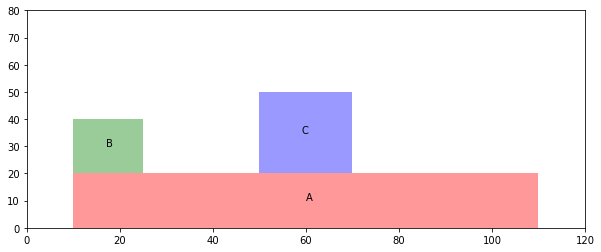

In [182]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.figure(figsize=(10,4)) 
plt.xlim(0, 120)
plt.ylim(0, 80)

left, bottom, width, height = (10, 0, 100, 20)
rect=patches.Rectangle((left,bottom),width,height, 
                        alpha=0.4,
                        facecolor="red")
plt.gca().add_patch(rect)
plt.text(60, 10, "A")

left, bottom, width, height = (10, 20, 15, 20)
rect=patches.Rectangle((left,bottom),width,height, 
                        alpha=0.4,
                        facecolor="green")
plt.gca().add_patch(rect)
plt.text(17, 30, "B")


left, bottom, width, height = (50, 20, 20, 30)
rect=patches.Rectangle((left,bottom),width,height, 
                        alpha=0.4,
                        facecolor="blue")
plt.gca().add_patch(rect)
plt.text(59, 35, "C")


In [150]:
class Rectangle:
    
    def __init__(self, x, y, w, h):
        self.x = x
        self.y = y
        self.w = w
        self.h = h

def intersecting(r1, r2):
    
    if ((r1.x >= r2.x + r2.w) or (r1.x + r1.w <= r2.x) or (r1.y < r2.y - r2.h) or (r1.y - r1.h > r2.y)) == True:
        return False
    else:
        return True

In [151]:
a = Rectangle(10, 20, 100, 20)
b = Rectangle(10, 40, 15, 20)
c = Rectangle(50, 50, 20, 30)

In [152]:
intersecting(a, b)

True

In [153]:
intersecting(a, c)

True

In [154]:
intersecting(b, c)

False